## Base de datos
La base de datos a ser utilizada es la [Acoustic path database for ANC in-ear headphone development](https://www.iks.rwth-aachen.de/forschung/tools-downloads/databases/paths-for-active-noise-cancellation-development-and-research) de la universidad de Aachen, Alemania.

Proveen mediciones del "Electronic Backend", que es la respuesta en frecuencia del conjunto ADC-DAC y filtrado anti-alias.

Miden en dos lugares, una cabina acústica (Acoustic Booth) y una cámara semi-anecoica.

$f_s = 48kHz$, 194400 muestras, 4.05 segundos de sweep logarítmico.




In [1]:
import json

In [23]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [2]:
database_path = "../../PANDAR_database_1.0/BoseQC20/processed_data.json"

In [9]:
with open(database_path) as f:
    data = json.load(f)

print(len(data['acoustic_booth'][0]['P'][1]))

8192


In [32]:
# Obtain single acoustic system measurement
acoustic_system = data['acoustic_booth'][0]

meas_idx = 0

# Obtain each path's impulse response
# Only left channel will be used from now on
primary_path = np.array(acoustic_system['P'][meas_idx])
secondary_path = np.array(acoustic_system['G'][meas_idx])
feedback_path = np.array(acoustic_system['F'][meas_idx])

print(f'Campos del sistema acústico: {acoustic_system.keys()}')
print(f'Longitud: {len(primary_path)} muestras')

Campos del sistema acústico: dict_keys(['P', 'G', 'F'])
Longitud: 8192 muestras


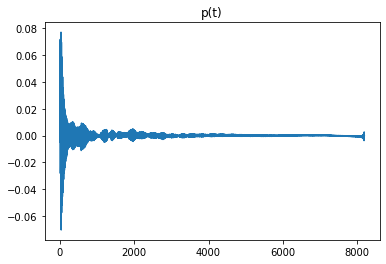

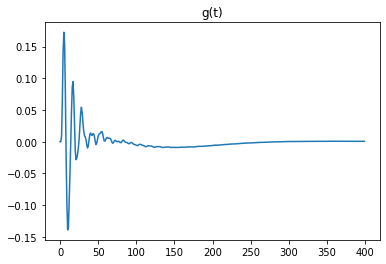

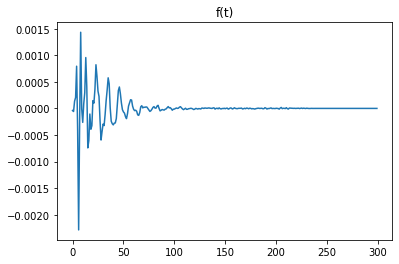

In [44]:
plt.title('p(t)')
plt.plot(primary_path)
plt.figure()
plt.title('g(t)')
plt.plot(secondary_path[0:400])
plt.figure()
plt.title('f(t)')
plt.plot(feedback_path[0:300])
plt.show()